In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Elective_Groups/Capstone/Step_6_Dashboard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148736 entries, 0 to 148735
Data columns (total 62 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         148736 non-null  int64  
 1   client_id                          148736 non-null  int64  
 2   Total_Quantity                     148736 non-null  int64  
 3   Average_Quantity                   148736 non-null  float64
 4   Number_of_Purchase                 148736 non-null  int64  
 5   Total_Sales                        148736 non-null  float64
 6   Average_Sales                      148736 non-null  float64
 7   R_Total_Quantity                   148736 non-null  int64  
 8   R_Average_Quantity                 88132 non-null   float64
 9   R_Number_of_Purchase               148736 non-null  int64  
 10  R_Total_Sales                      148736 non-null  float64
 11  R_Average_Sales                    8813

In [4]:
df.head()

,Unnamed: 0,client_id,Total_Quantity,Average_Quantity,Number_of_Purchase,Total_Sales,Average_Sales,R_Total_Quantity,R_Average_Quantity,R_Number_of_Purchase,...,RFM_Segment,RFM_Score,General_Segment,Longterm_Engaged,Main_channel,Main_channel_amount,Main_product,Main_product_amount,product_group,refund_flag
0,0,188502,140138,227.4968,616,66700.3360,108.2798,42,5.2500,8,...,Champion,14,Gold,1.0000,online,50733.8440,603987,8335.2000,Product_A,1
1,1,1977896,293627,567.9439,517,145390.9000,281.2203,260,43.3333,6,...,Cannot Lose Them,11,Gold,0.0000,online,135610.6900,130187,17327.6105,Product_A,1
2,2,2086861,19161,58.9569,325,40332.0100,124.0985,2018,504.5000,4,...,Champion,15,Gold,1.0000,by phone,26455.4980,1119307,3209.4568,Product_A,1
3,3,482822,6740,37.4444,180,16716.5840,92.8699,0,NaN,0,...,Loyal Customer,12,Gold,1.0000,by phone,9846.7290,358838,1765.6548,Product_A,0
4,4,224223,27219,26.0968,1043,124999.4400,119.8461,105,8.0769,13,...,Champion,15,Gold,1.0000,at the store,66322.3400,840202,4816.2000,Product_A,1


In [5]:
df.columns

Index(['Unnamed: 0', 'client_id', 'Total_Quantity', 'Average_Quantity',
       'Number_of_Purchase', 'Total_Sales', 'Average_Sales',
       'R_Total_Quantity', 'R_Average_Quantity', 'R_Number_of_Purchase',
       'R_Total_Sales', 'R_Average_Sales', 'Last_Activity_Day',
       'First_Activity_Day', 'Last_Activity_Month', 'First_Activity_Month',
       'Average_Purchase_Day_All', 'Average_Purchase_Day',
       'Average_Purchase_Day_Within_Month', 'Store_Total_Quantity',
       'Store_Average_Quantity', 'Store_Number_of_Purchase',
       'Store_Total_Sales', 'Store_Average_Sales', 'Phone_Total_Quantity',
       'Phone_Average_Quantity', 'Phone_Number_of_Purchase',
       'Phone_Total_Sales', 'Phone_Average_Sales', 'Visit_Total_Quantity',
       'Visit_Average_Quantity', 'Visit_Number_of_Purchase',
       'Visit_Total_Sales', 'Visit_Average_Sales', 'Online_Total_Quantity',
       'Online_Average_Quantity', 'Online_Number_of_Purchase',
       'Online_Total_Sales', 'Online_Average_Sales', 'O

In [6]:
training_attr = ['Total_Quantity', 'Average_Quantity',
       'Number_of_Purchase', 'Total_Sales', 'Average_Sales',
       'R_Total_Quantity', 'R_Average_Quantity', 'R_Number_of_Purchase',
       'R_Total_Sales', 'R_Average_Sales', 
       'Average_Purchase_Day_All', 'Average_Purchase_Day',
       'Average_Purchase_Day_Within_Month', 'Store_Total_Quantity',
       'Store_Average_Quantity', 'Store_Number_of_Purchase',
       'Store_Total_Sales', 'Store_Average_Sales', 'Phone_Total_Quantity',
       'Phone_Average_Quantity', 'Phone_Number_of_Purchase',
       'Phone_Total_Sales', 'Phone_Average_Sales', 'Visit_Total_Quantity',
       'Visit_Average_Quantity', 'Visit_Number_of_Purchase',
       'Visit_Total_Sales', 'Visit_Average_Sales', 'Online_Total_Quantity',
       'Online_Average_Quantity', 'Online_Number_of_Purchase',
       'Online_Total_Sales', 'Online_Average_Sales', 'Other_Total_Quantity',
       'Other_Average_Quantity', 'Other_Number_of_Purchase',
       'Other_Total_Sales', 'Other_Average_Sales',
       'Recency', 'Frequency', 'Monetary_Value','Longterm_Engaged','refund_flag'
]

label_attr = 'RFM_Segment'

In [7]:
X = df[training_attr].fillna(0)
y = df[label_attr]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_std  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

1.1 Logistic Regression with Imbalanced Data

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [12]:
model.fit(X_train_std, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [13]:
model.score(X_train_std, y_train), model.score(X_test_std, y_test)

(0.7688613552321951, 0.7689428744313216)

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(X_test_std)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.6505591877771308
Recall: 0.5913131130545776
F1 Score: 0.6070713023637327


In [15]:
model.classes_

array(['About To Sleep', 'At Risk', 'Cannot Lose Them', 'Champion',
       'Esporadic', 'Hibernating', 'Lost', 'Loyal Customer',
       'New Customer', 'Potential Loyalist', 'Promising'], dtype=object)

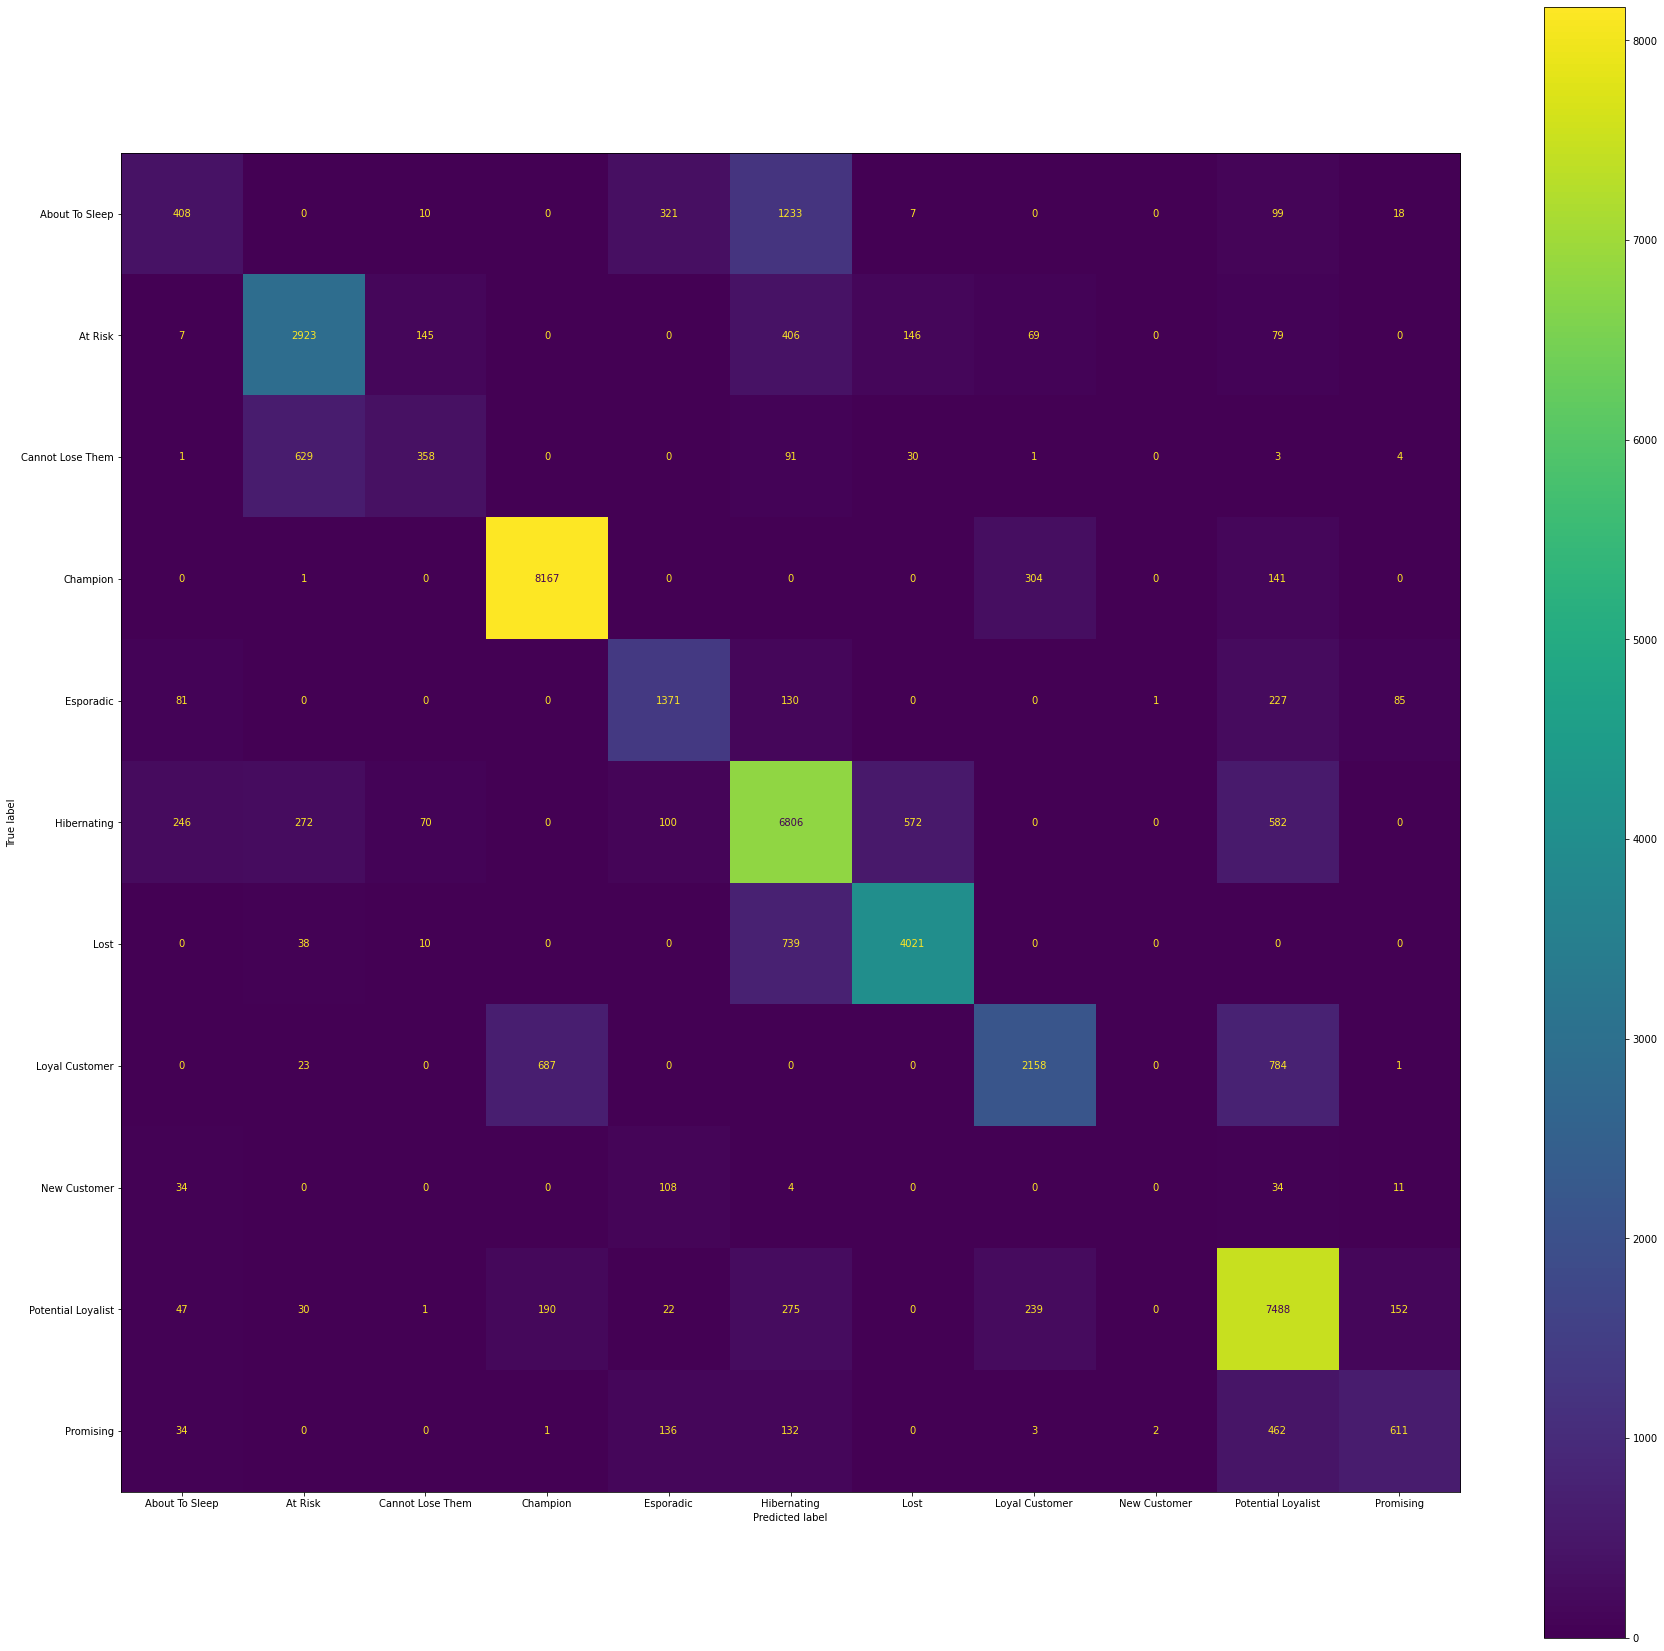

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, model.predict(X_test_std), labels=model.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(30,30))
cmp.plot(ax=ax)

In [17]:
segment_prob = model.predict_proba(X_test_std)

In [18]:
segment_prob[0]

array([2.89167765e-01, 3.03727478e-09, 8.45906501e-06, 3.83078908e-34,
       2.72830489e-01, 4.02876045e-01, 1.94604933e-02, 3.65571965e-18,
       1.54740566e-02, 4.13104284e-07, 1.82275704e-04])

Commented

1.2 Logistic Regression with SMOTE applied

In [19]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [20]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({'Hibernating': 28827, 'Champion': 28711, 'Potential Loyalist': 28145, 'Lost': 16025, 'At Risk': 12584, 'Loyal Customer': 12175, 'About To Sleep': 6987, 'Esporadic': 6316, 'Promising': 4605, 'Cannot Lose Them': 3723, 'New Customer': 638})


In [21]:
len(y)

148736

In [22]:
sm = SMOTE(random_state=42)

In [23]:
X_res, y_res = sm.fit_resample(X, y)

In [24]:
print('New dataset shape %s' % Counter(y_res))

New dataset shape Counter({'Champion': 28827, 'Cannot Lose Them': 28827, 'Loyal Customer': 28827, 'Lost': 28827, 'Potential Loyalist': 28827, 'At Risk': 28827, 'About To Sleep': 28827, 'Hibernating': 28827, 'Esporadic': 28827, 'Promising': 28827, 'New Customer': 28827})


In [25]:
from sklearn.model_selection import train_test_split

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=1)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std_res = pd.DataFrame(scaler.fit_transform(X_train_res), columns=X_train.columns)
X_test_std_res  = pd.DataFrame(scaler.transform(X_test_res), columns=X_test.columns)

In [27]:
model_smote = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [28]:
model_smote.fit(X_train_std_res, y_train_res)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [29]:
model_smote.score(X_train_std_res, y_train_res), model_smote.score(X_test_std_res, y_test_res)

(0.7467172822132081, 0.7439451277199621)

In [30]:
model_smote.score(X_train_std, y_train), model_smote.score(X_test_std, y_test)

(0.47573356384766846, 0.4740592994330024)

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model_smote.predict(X_test_std)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.49081395140278355
Recall: 0.5513073525001967
F1 Score: 0.4274596844935621


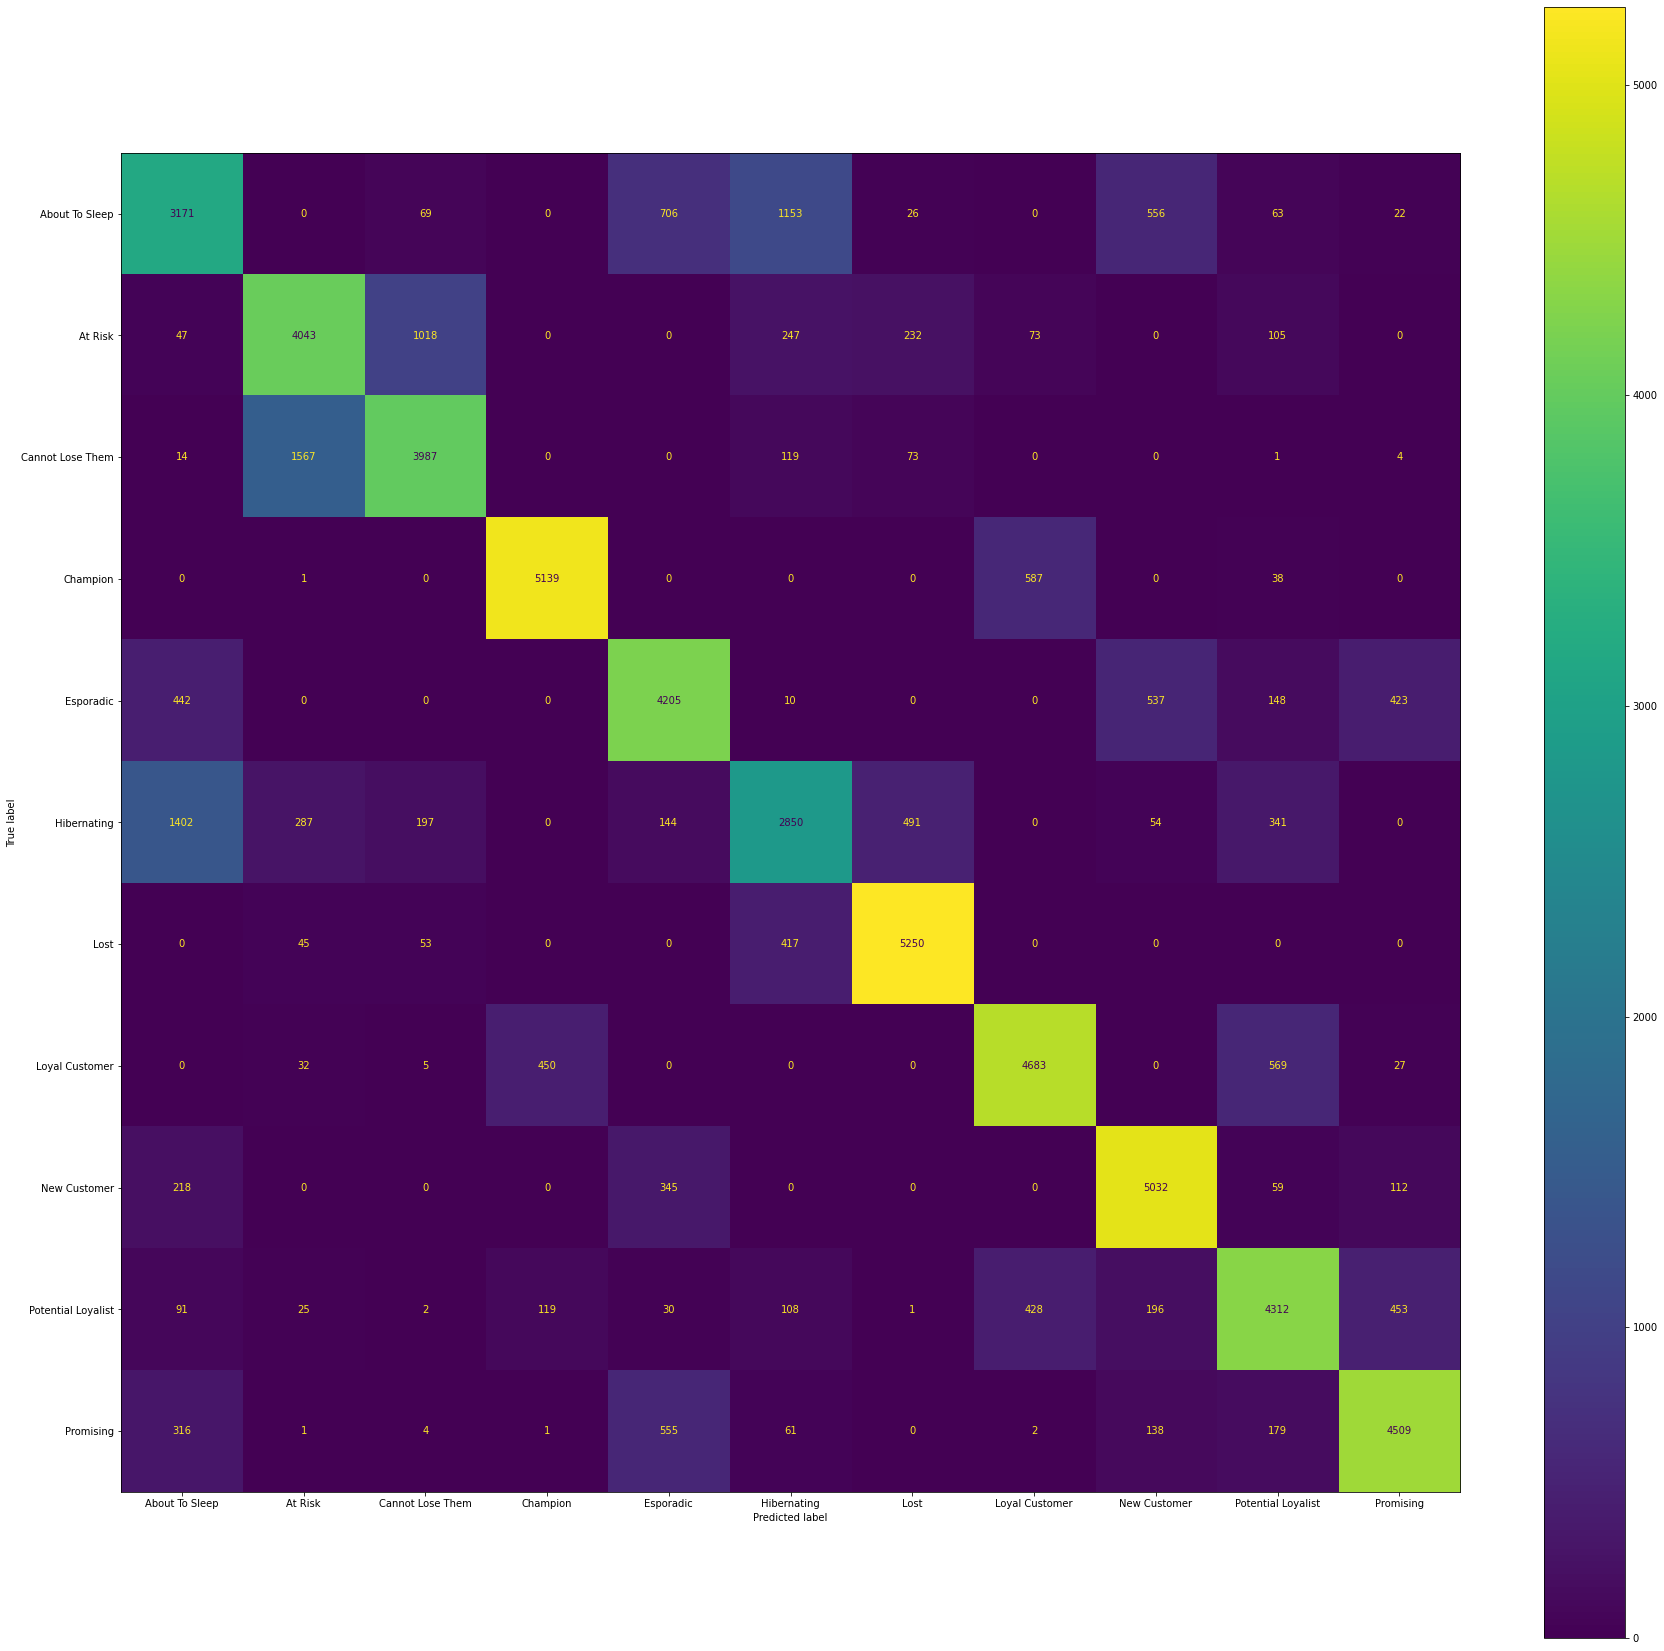

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_res, model_smote.predict(X_test_std_res), labels=model_smote.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_smote.classes_)
fig, ax = plt.subplots(figsize=(30,30))
cmp.plot(ax=ax)

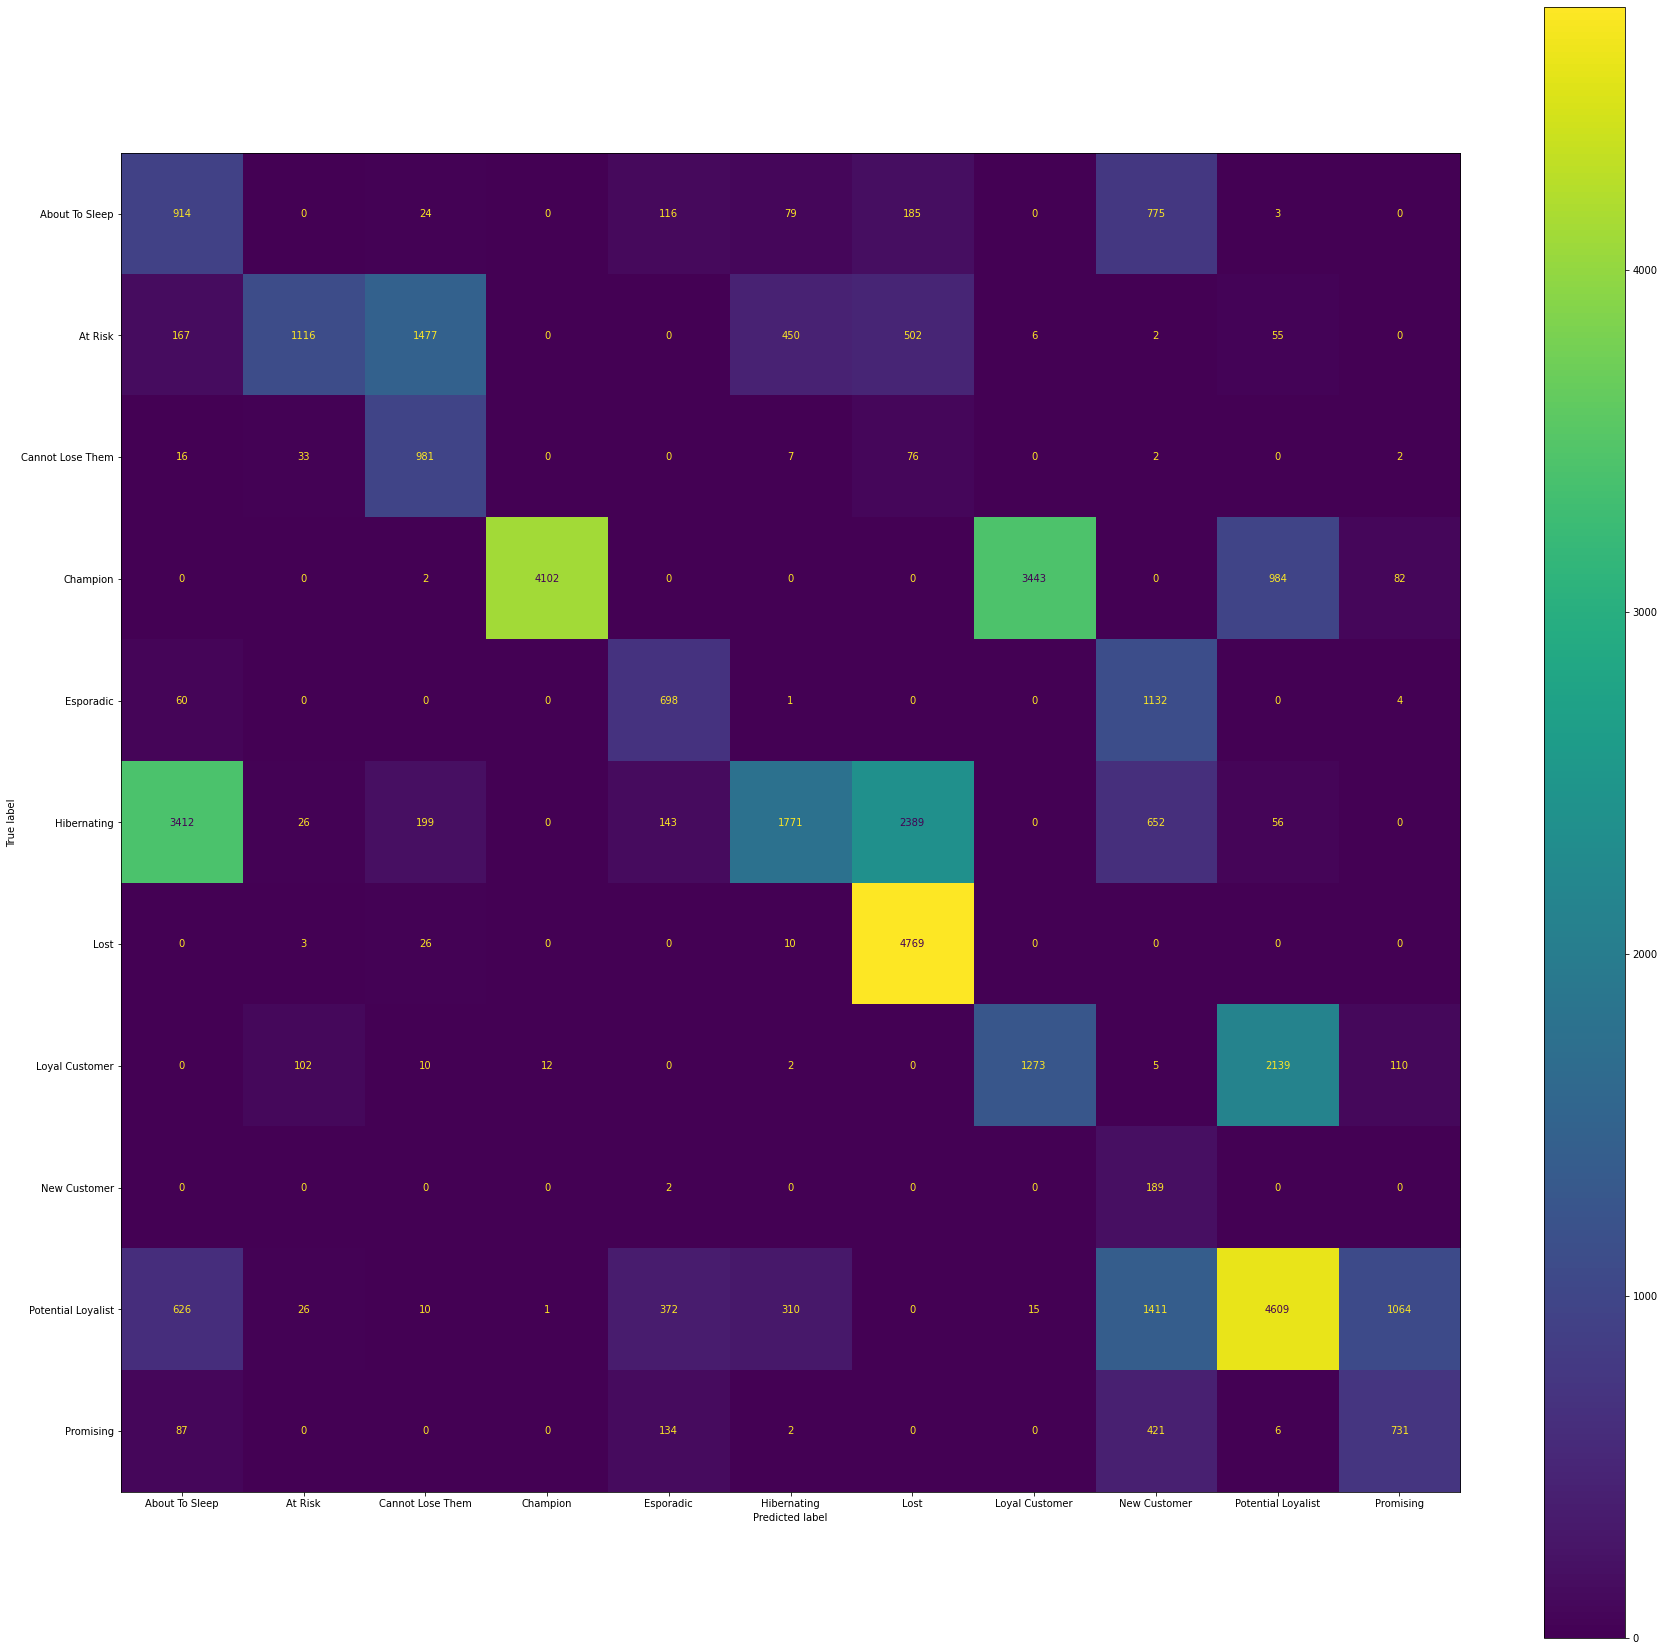

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, model_smote.predict(X_test_std), labels=model_smote.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_smote.classes_)
fig, ax = plt.subplots(figsize=(30,30))
cmp.plot(ax=ax)

In [34]:
segment_prob_balanced = model_smote.predict_proba(X_test_std.sort_index())

In [35]:
len(segment_prob_balanced)

44621

In [36]:
segment_prob_balanced[0]

array([2.72623576e-29, 2.76083343e-03, 9.49130994e-12, 4.66798712e-01,
       1.90834393e-22, 1.92824009e-10, 1.12335199e-44, 5.25305617e-01,
       3.81149965e-46, 5.02103068e-03, 1.13807036e-04])

1.3 Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [38]:
# import random
# count = 0
# best_parameter = ['',0]

# while count < 10:
#   selected_parameter = []
#   selected_parameter.append(random.choice(random_grid['bootstrap']))
#   selected_parameter.append(random.choice(random_grid['max_depth']))
#   selected_parameter.append(random.choice(random_grid['max_features']))
#   selected_parameter.append(random.choice(random_grid['min_samples_leaf']))
#   selected_parameter.append(random.choice(random_grid['min_samples_split']))
#   selected_parameter.append(random.choice(random_grid['n_estimators']))
#   print('bootstrap:', selected_parameter[0],'; max_depth:', selected_parameter[1],'; max_features:', selected_parameter[2],'; min_samples_leaf:', selected_parameter[3],'; min_samples_split:', selected_parameter[4],'; n_estimators:', selected_parameter[5])
#   clf = RandomForestClassifier(bootstrap = selected_parameter[0], max_depth = selected_parameter[1], max_features = selected_parameter[2], min_samples_leaf = selected_parameter[3], min_samples_split = selected_parameter[4], n_estimators = selected_parameter[5])
#   clf.fit(X_train_std_res, y_train_res)
#   train_score = clf.score(X_train_std, y_train)
#   test_score = clf.score(X_test_std, y_test)
#   print(train_score, test_score)
#   if test_score > best_parameter[1]:
#     best_parameter[0] = selected_parameter
#     best_parameter[1] = test_score
#   count += 1

In [39]:
best_parameter = [[False, 40, 'sqrt', 2, 5, 500], 0.6035274870576635]

In [40]:
clf = RandomForestClassifier(bootstrap = best_parameter[0][0], max_depth = best_parameter[0][1], max_features = best_parameter[0][2], min_samples_leaf = best_parameter[0][3], min_samples_split = best_parameter[0][4], n_estimators = best_parameter[0][5])
clf.fit(X_train_std_res, y_train_res)

RandomForestClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500)

In [60]:
clf.score(X_train_std, y_train), clf.score(X_test_std, y_test)

(0.5962925611103107, 0.5951457833755407)

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = clf.predict(X_test_std)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.5929491259288023
Recall: 0.6095515472801001
F1 Score: 0.5468014230853872


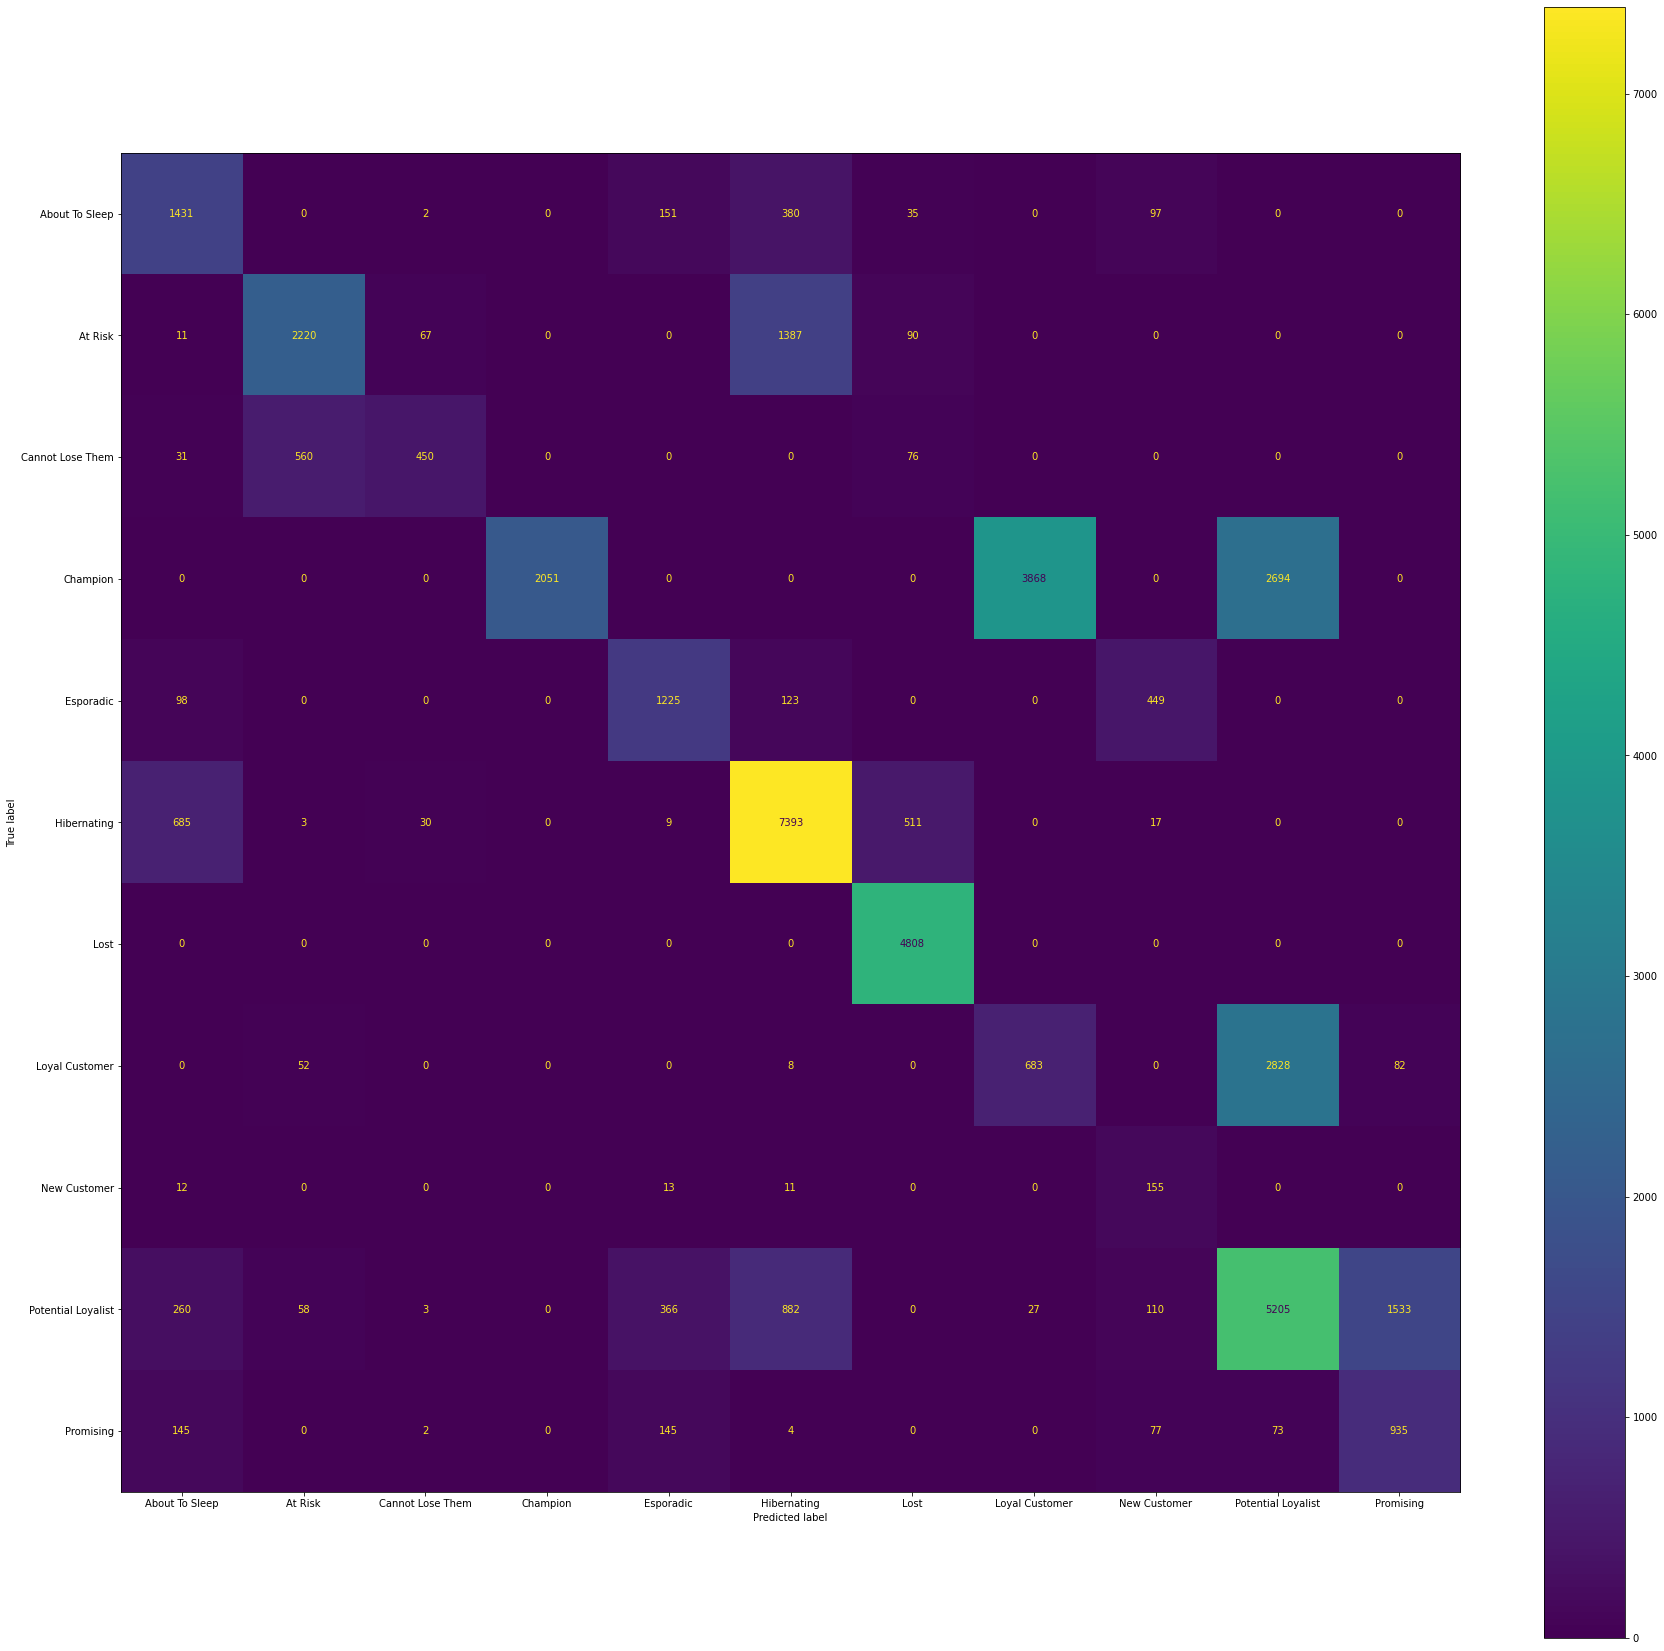

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, clf.predict(X_test_std), labels=clf.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(30,30))
cmp.plot(ax=ax)

In [43]:
y_prob = clf.predict_proba(X_test_std)
print(y_prob[:5])

[[3.48333333e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.42535714e-01 8.08809524e-02 3.50000000e-02 0.00000000e+00
  3.06750000e-01 0.00000000e+00 0.00000000e+00]
 [1.90000000e-02 0.00000000e+00 2.66666667e-03 0.00000000e+00
  2.00000000e-03 6.66666667e-03 9.66666667e-01 0.00000000e+00
  2.00000000e-03 1.00000000e-03 0.00000000e+00]
 [3.50000000e-03 1.13333333e-02 0.00000000e+00 3.00000000e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 9.47000000e-01
  0.00000000e+00 3.11666667e-02 4.00000000e-03]
 [8.15000000e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.05666667e-02 7.02242424e-01 9.68575758e-02 0.00000000e+00
  2.88333333e-02 0.00000000e+00 0.00000000e+00]
 [6.66666667e-04 4.60000000e-02 2.00000000e-03 2.16666667e-02
  0.00000000e+00 1.00000000e-03 0.00000000e+00 7.02666667e-01
  0.00000000e+00 2.22000000e-01 4.00000000e-03]]


In [44]:
roc_dataset = y_test.to_frame(name='y_real')

In [45]:
roc_dataset['y_pred'] =  y_pred
roc_dataset

,y_real,y_pred
88296,Esporadic,Esporadic
115958,Lost,Lost
44431,Champion,Loyal Customer
127012,Hibernating,Hibernating
145874,Champion,Loyal Customer
...,...,...
109185,Hibernating,Hibernating
16791,At Risk,At Risk
129652,At Risk,At Risk
107703,Hibernating,Hibernating


In [46]:
# all imports
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.datasets import  make_classification
from sklearn.ensemble import RandomForestClassifier


In [47]:
n_classes = len(np.unique(y_test))
y_test_roc = label_binarize(y_test, classes=np.unique(y_test))
y_pred_roc = label_binarize(y_pred, classes=np.unique(y_test))

In [48]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_pred_roc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])  

In [49]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_pred_roc.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [50]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

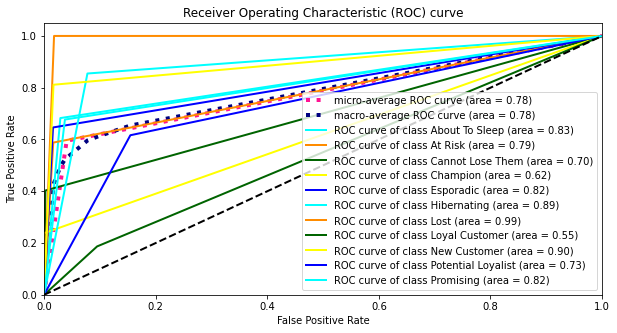

In [51]:
# Plot all ROC curves
plt.figure(figsize=(10,5))
#plt.figure(dpi=800)
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink", linestyle=":", linewidth=4,)

plt.plot(fpr["macro"], tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy", linestyle=":", linewidth=4,)

colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(np.unique(y_test)[i], roc_auc[i]),)

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) curve")
plt.legend()

1.4 Best Model for churn scoring

In [52]:
segment_prob_balanced = clf.predict_proba(X_test_std.sort_index())

In [53]:
segment_merged = pd.merge(df[['client_id']], y_test, left_index=True, right_index=True)

In [54]:
#logistric regresion model with smote function
segment_merged['probs'] = segment_prob_balanced.tolist()

In [55]:
segment_merged[model_smote.classes_] = pd.DataFrame(segment_merged.probs.tolist(), index= segment_merged.index)
segment_merged = segment_merged.drop(columns=['probs'])
segment_merged

,client_id,RFM_Segment,About To Sleep,At Risk,Cannot Lose Them,Champion,Esporadic,Hibernating,Lost,Loyal Customer,New Customer,Potential Loyalist,Promising
0,188502,Champion,0.0030,0.0238,0.0045,0.2338,0.0000,0.0000,0.0000,0.6732,0.0000,0.0568,0.0048
7,1397075,Lost,0.0128,0.0178,0.0000,0.0000,0.0047,0.0638,0.8903,0.0000,0.0033,0.0072,0.0000
13,480922,Champion,0.0055,0.0388,0.0047,0.0337,0.0010,0.0007,0.0000,0.5200,0.0000,0.3762,0.0195
15,1250560,Champion,0.0000,0.0135,0.0025,0.5235,0.0000,0.0000,0.0000,0.3815,0.0000,0.0570,0.0220
21,781993,Champion,0.0000,0.0253,0.0068,0.5618,0.0000,0.0000,0.0000,0.3782,0.0000,0.0177,0.0102
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148721,445466,Potential Loyalist,0.2347,0.0050,0.0000,0.0000,0.0000,0.1535,0.0482,0.0033,0.0025,0.5517,0.0010
148723,1743453,Potential Loyalist,0.3666,0.0000,0.0000,0.0000,0.0010,0.0370,0.0210,0.0013,0.0157,0.5563,0.0011
148727,1458575,Potential Loyalist,0.0127,0.0397,0.1073,0.0300,0.0000,0.0112,0.0000,0.2920,0.0000,0.4887,0.0185
148730,1181580,About To Sleep,0.8334,0.0000,0.0000,0.0000,0.0037,0.0404,0.0263,0.0000,0.0077,0.0843,0.0043


In [56]:
# the weight come from the ROC value for each segment, while we only these selected segments
segment_merged['score'] = segment_merged['About To Sleep'] * 0.83 + segment_merged['Hibernating'] * 0.89 + segment_merged['At Risk'] * 0.79 * 2 + segment_merged['Cannot Lose Them'] * 0.7 * 2

In [57]:
segment_merged.groupby('RFM_Segment').mean().reset_index().sort_values(by='score',ascending=False)

,RFM_Segment,client_id,About To Sleep,At Risk,Cannot Lose Them,Champion,Esporadic,Hibernating,Lost,Loyal Customer,New Customer,Potential Loyalist,Promising,score
2,Cannot Lose Them,1154064.0367,0.0370,0.4198,0.4167,0.0058,0.0005,0.0308,0.0581,0.0134,0.0008,0.0114,0.0056,1.3049
1,At Risk,1128661.7719,0.0175,0.5135,0.0646,0.0020,0.0008,0.3175,0.0410,0.0076,0.0012,0.0267,0.0075,1.1989
5,Hibernating,1150890.1162,0.1600,0.0199,0.0087,0.0000,0.0366,0.6081,0.1163,0.0001,0.0269,0.0115,0.0118,0.7177
0,About To Sleep,1142723.9179,0.5501,0.0028,0.0103,0.0000,0.1035,0.1675,0.0642,0.0000,0.0816,0.0101,0.0099,0.6244
8,New Customer,1127451.8482,0.1665,0.0006,0.0000,0.0000,0.1659,0.0758,0.0270,0.0000,0.5274,0.0133,0.0236,0.2065
9,Potential Loyalist,1135601.1177,0.0556,0.0230,0.0038,0.0005,0.0506,0.0963,0.0044,0.0148,0.0187,0.5131,0.2192,0.1735
4,Esporadic,1124933.9293,0.0986,0.0002,0.0000,0.0000,0.5413,0.0796,0.0184,0.0000,0.2330,0.0046,0.0243,0.1530
10,Promising,1120611.4381,0.1111,0.0040,0.0114,0.0001,0.1120,0.0245,0.0057,0.0009,0.0633,0.0980,0.5690,0.1364
7,Loyal Customer,1168635.8114,0.0066,0.0550,0.0036,0.0070,0.0008,0.0072,0.0001,0.1982,0.0002,0.6737,0.0477,0.1037
6,Lost,1139751.2346,0.0243,0.0071,0.0024,0.0000,0.0050,0.0327,0.9188,0.0000,0.0068,0.0025,0.0005,0.0637


In [58]:
segment_merged.sort_values(by=['score'], ascending=False).to_csv('/content/drive/MyDrive/Elective_Groups/Capstone/Step_7_Score_Dashboard.csv')